  vendor_name model_name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0     adviser      32/60   125   256   6000   256     16    128  198  199
1      amdahl     470v/7    29  8000  32000    32      8     32  269  253
2      amdahl    470v/7a    29  8000  32000    32      8     32  220  253
3      amdahl    470v/7b    29  8000  32000    32      8     32  172  253
4      amdahl    470v/7c    29  8000  16000    32      8     16  132  132
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   model_name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 


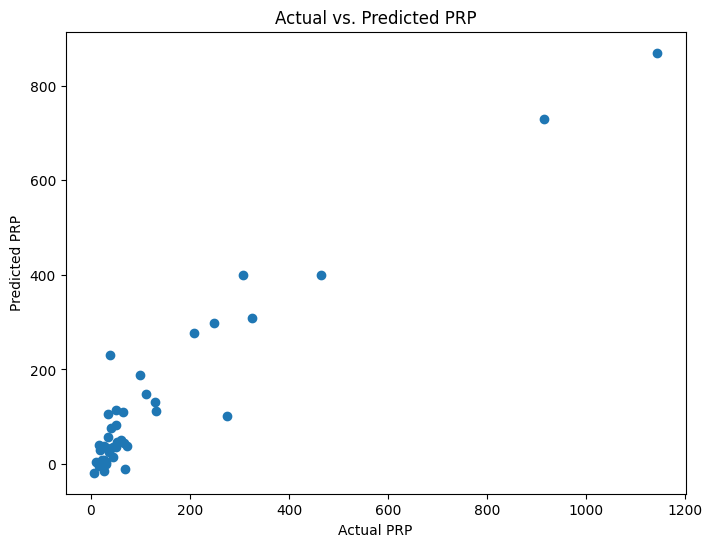

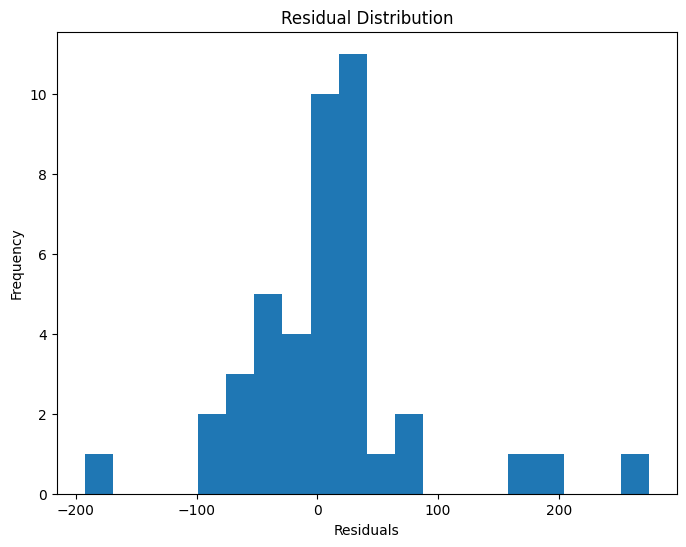

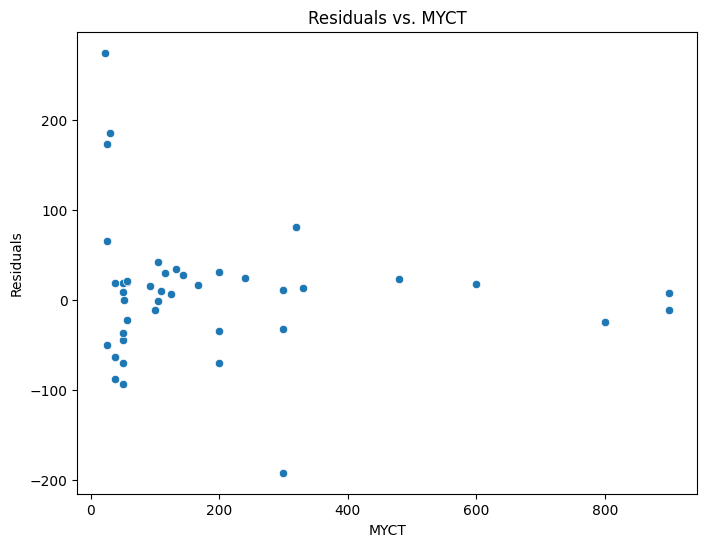

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler




# 3차 프로그래밍과제 구현 내용 1번문제
 

# 데이터 셋 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
column_names = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv(url, names=column_names)

# 데이터 살펴보기
print(data.head())
print(data.info())
print(data.describe())

# 필요없는 열 제거
data = data.drop(['vendor_name', 'model_name', 'ERP'], axis=1)

#데이터 정규화
scaler = StandardScaler()
X = data.drop('PRP', axis=1)
X = scaler.fit_transform(X)
y = data['PRP']

#데이터분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")

# 교차 검증
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Average Cross-validation R^2: {np.mean(cv_scores)}")

# 분석 결과 시각화
# 1. 실제값 vs 예측값 산점도
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Actual vs. Predicted PRP")
plt.show()

# 2. 잔차 분석 (실제값 - 예측값)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# 3. 특징과 잔차의 관계 (선형 회귀 가정 확인)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['MYCT'], y=residuals)
plt.xlabel("MYCT")
plt.ylabel("Residuals")
plt.title("Residuals vs. MYCT")
plt.show()

In [12]:
# 3차 프로그래밍과제 구현 내용 2번문제


# 학습 데이터에 대한 성능 평가
y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("학습 데이터 성능 평가:")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean Absolute Error: {mae_train}")
print(f"R^2: {r2_train}")

# 테스트 데이터에 대한 성능 평가
y_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("\n테스트 데이터 성능 평가:")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R^2: {r2_test}")

# 교차 검증
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R^2 scores: {cv_scores}")
print(f"Average Cross-validation R^2: {np.mean(cv_scores)}")


학습 데이터 성능 평가:
Mean Squared Error: 3117.658905430177
Mean Absolute Error: 35.12200634651682
R^2: 0.8378284557995717

테스트 데이터 성능 평가:
Mean Squared Error: 5633.068155793262
Mean Absolute Error: 48.06880134700473
R^2: 0.8893455830696774

Cross-validation R^2 scores: [ 0.83594822 -0.09964463  0.86840964  0.84135651  0.63509917]
Average Cross-validation R^2: 0.6162337806164521


In [13]:
# 3차 프로그래밍과제 구현 내용 3번문제

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline




# 데이터 셋 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data'
column_names = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
data = pd.read_csv(url, names=column_names)

# 필요없는 열 제거
data = data.drop(['vendor_name', 'model_name', 'ERP'], axis=1)

# 데이터 분할
X = data.drop('PRP', axis=1)
y = data['PRP']

# KFold 교차 검증 사용
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold 교차 검증

best_r2 = -np.inf  # 최적 R^2 값 초기화
best_model = None  # 최적 모델 초기화

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 데이터 정규화
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 모델 훈련
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 테스트 데이터에 대한 성능 평가
    y_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_pred)

    # 최적 모델 업데이트
    if r2_test > best_r2:
        best_r2 = r2_test
        best_model = model

# 최적 모델을 사용하여 테스트 데이터에 대한 성능 평가
y_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print(f"\n테스트 데이터 성능 평가 (개선된 LinearRegression 모델): R^2: {r2_test}")


테스트 데이터 성능 평가 (개선된 LinearRegression 모델): R^2: 0.9074277417952122
